In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

## to display all rows columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
df = pd.read_csv('ODI_data.csv')

In [3]:
df.head(10)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,11-08-2019,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N Pooran,42,42,69,1.0,0.0,52,4,1,80.76,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SO Hetmyer,18,18,31,1.0,0.0,20,2,0,90,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RL Chase,18,18,34,1.0,0.0,23,0,0,78.26,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SS Cottrell,17,17,23,1.0,0.0,18,2,1,94.44,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,JO Holder,13*,13,38,1.0,1.0,19,0,0,68.42,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CH Gayle,11,11,49,1.0,0.0,24,1,0,45.83,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,SD Hope,5,5,14,1.0,0.0,10,0,0,50,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CR Brathwaite,0,0,5,1.0,0.0,3,0,0,0,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,KAJ Roach,0,0,5,1.0,0.0,3,0,0,0,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
len(df.columns)

28

In [5]:
df.shape

(171968, 28)

In [6]:
df.columns

Index(['Innings Player', 'Innings Runs Scored', 'Innings Runs Scored Num',
       'Innings Minutes Batted', 'Innings Batted Flag', 'Innings Not Out Flag',
       'Innings Balls Faced', 'Innings Boundary Fours',
       'Innings Boundary Sixes', 'Innings Batting Strike Rate',
       'Innings Number', 'Opposition', 'Ground', 'Innings Date', 'Country',
       '50's', '100's', 'Innings Runs Scored Buckets', 'Innings Overs Bowled',
       'Innings Bowled Flag', 'Innings Maidens Bowled',
       'Innings Runs Conceded', 'Innings Wickets Taken', '4 Wickets',
       '5 Wickets', '10 Wickets', 'Innings Wickets Taken Buckets',
       'Innings Economy Rate'],
      dtype='object')

In [7]:
# Runs per innings = total runs / total innings
# SR = 100*(total runs/total balls)
# 100's = sum(100's)
# 50's = sum(50's)
# team contribution = players runs/Team runs

In [8]:
df['Innings Runs Scored Num'].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '-', nan, '40', '6', '4', '87', '54', '46',
       '30', '12', '69', '39', '14', '10', '9', '8', '7', '82', '52',
       '41', '15', '98', '43', '19', '111', '48', '36', '25', '67', '60',
       '84', '59', '55', '47', '85', '49', '45', '34', '29', '22', '74',
       '28', '77', '50', '32', '23', '35', '122', '100', '95', '103',
       '113', '53', '96', '27', '64', '58', '33', '31', '73', '56', '86',
       '62', '106', '24', '57', '104', '26', '66', '51', '118', '105',
       '101', '21', '79', '44', '102', '88', '80', '72', '97', '68', '89',
       '38', '83', '63', '148', '166', '90', '76', '37', '70', '124',
       '94', '140', '153', '107', '117', '121', '92', '78', '75', '114',
       '115', '130', '128', '151', '110', '138', '135', '109', '61',
       '179', '170', '112', '116', '91', '143', '93', '123', '145', '81',
       '150', '162', '108', '131', '133', '137', '146', '139', 

In [9]:
df = df[df['Innings Runs Scored Num'] != '-']

In [10]:
df['Innings Runs Scored Num'].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', nan, '40', '6', '4', '87', '54', '46', '30',
       '12', '69', '39', '14', '10', '9', '8', '7', '82', '52', '41',
       '15', '98', '43', '19', '111', '48', '36', '25', '67', '60', '84',
       '59', '55', '47', '85', '49', '45', '34', '29', '22', '74', '28',
       '77', '50', '32', '23', '35', '122', '100', '95', '103', '113',
       '53', '96', '27', '64', '58', '33', '31', '73', '56', '86', '62',
       '106', '24', '57', '104', '26', '66', '51', '118', '105', '101',
       '21', '79', '44', '102', '88', '80', '72', '97', '68', '89', '38',
       '83', '63', '148', '166', '90', '76', '37', '70', '124', '94',
       '140', '153', '107', '117', '121', '92', '78', '75', '114', '115',
       '130', '128', '151', '110', '138', '135', '109', '61', '179',
       '170', '112', '116', '91', '143', '93', '123', '145', '81', '150',
       '162', '108', '131', '133', '137', '146', '139', '125'

In [11]:
df = df.dropna(subset= ['Innings Runs Scored Num'])

In [12]:
df['Innings Runs Scored Num'].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '40', '6', '4', '87', '54', '46', '30', '12',
       '69', '39', '14', '10', '9', '8', '7', '82', '52', '41', '15',
       '98', '43', '19', '111', '48', '36', '25', '67', '60', '84', '59',
       '55', '47', '85', '49', '45', '34', '29', '22', '74', '28', '77',
       '50', '32', '23', '35', '122', '100', '95', '103', '113', '53',
       '96', '27', '64', '58', '33', '31', '73', '56', '86', '62', '106',
       '24', '57', '104', '26', '66', '51', '118', '105', '101', '21',
       '79', '44', '102', '88', '80', '72', '97', '68', '89', '38', '83',
       '63', '148', '166', '90', '76', '37', '70', '124', '94', '140',
       '153', '107', '117', '121', '92', '78', '75', '114', '115', '130',
       '128', '151', '110', '138', '135', '109', '61', '179', '170',
       '112', '116', '91', '143', '93', '123', '145', '81', '150', '162',
       '108', '131', '133', '137', '146', '139', '125', '12

In [13]:
df.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,11-08-2019,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N Pooran,42,42,69,1.0,0.0,52,4,1,80.76,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df['Innings Runs Scored Num'] = df['Innings Runs Scored Num'].astype('int')

In [15]:
df['Innings Balls Faced'] = df['Innings Balls Faced'].astype('int')

In [16]:
df['Innings Not Out Flag'] = df['Innings Not Out Flag'].astype('int')

In [17]:
# convert to datetime

df['Innings Date'] = pd.to_datetime(df['Innings Date'])

In [18]:
df['year'] = df['Innings Date'].dt.year

In [19]:
df.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
0,E Lewis,65,65,128,1.0,0,80,8,1,81.25,2,v India,Port of Spain,2019-11-08,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,N Pooran,42,42,69,1.0,0,52,4,1,80.76,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [20]:
# sachin 1994-2004
# virat 2009-2019

sachin_df = df[(df.year >= 1994) & (df.year <= 2004)]

In [21]:
kohli_df = df[(df.year >= 2009) & (df.year <= 2019)]

In [22]:
sachin_df.head(3)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
77610,V Sehwag,70,70,85,1.0,0,52,9,2,134.61,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77611,Yuvraj Singh,69,69,34,1.0,0,32,8,3,215.62,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77612,R Dravid,60,60,87,1.0,0,68,5,0,88.23,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [23]:
kohli_df.head(3)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
0,E Lewis,65,65,128,1.0,0,80,8,1,81.25,2,v India,Port of Spain,2019-11-08,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,N Pooran,42,42,69,1.0,0,52,4,1,80.76,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
2,SO Hetmyer,18,18,31,1.0,0,20,2,0,90,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [24]:
df.dtypes

Innings Player                   object        
Innings Runs Scored              object        
Innings Runs Scored Num          int32         
Innings Minutes Batted           object        
Innings Batted Flag              float64       
Innings Not Out Flag             int32         
Innings Balls Faced              int32         
Innings Boundary Fours           object        
Innings Boundary Sixes           object        
Innings Batting Strike Rate      object        
Innings Number                   object        
Opposition                       object        
Ground                           object        
Innings Date                     datetime64[ns]
Country                          object        
50's                             float64       
100's                            float64       
Innings Runs Scored Buckets      object        
Innings Overs Bowled             object        
Innings Bowled Flag              float64       
Innings Maidens Bowled           object 

In [25]:
# what is the total run scored by sachin in these time frames

In [26]:
sachin_df.head(20)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
77610,V Sehwag,70,70,85,1.0,0,52,9,2,134.61,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77611,Yuvraj Singh,69,69,34,1.0,0,32,8,3,215.62,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77612,R Dravid,60,60,87,1.0,0,68,5,0,88.23,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77613,SC Ganguly,55,55,98,1.0,0,80,2,2,68.75,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77614,SR Tendulkar,47,47,60,1.0,0,42,9,0,111.9,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77615,M Kaif,29*,29,52,1.0,1,24,2,0,120.83,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77616,MS Dhoni,7*,7,2,1.0,1,2,0,1,350,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77621,Rajin Saleh,82,82,149,1.0,0,114,8,1,71.92,2,v India,Dhaka,2004-12-27,Bangladesh,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77622,Mashrafe Mortaza,39,39,12,1.0,0,20,3,3,195,2,v India,Dhaka,2004-12-27,Bangladesh,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77623,Mohammad Ashraful,32,32,52,1.0,0,34,4,0,94.11,2,v India,Dhaka,2004-12-27,Bangladesh,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [27]:
# SR Tendulkar
sdf = sachin_df[sachin_df['Innings Player'] == 'SR Tendulkar']

In [28]:
sdf.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
77614,SR Tendulkar,47,47,60,1.0,0,42,9,0,111.9,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77747,SR Tendulkar,19,19,46,1.0,0,32,3,0,59.37,1,v Bangladesh,Chattogram,2004-12-23,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
78054,SR Tendulkar,16,16,30,1.0,0,17,2,0,94.11,1,v Pakistan,Kolkata,2004-11-13,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
79590,SR Tendulkar,74,74,170,1.0,0,100,7,1,74,2,v Sri Lanka,Colombo (RPS),2004-01-08,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
79681,SR Tendulkar,18,18,30,1.0,0,21,3,0,85.71,1,v Sri Lanka,Colombo (RPS),2004-07-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [29]:
sum(sdf['Innings Runs Scored Num'])

11818

In [30]:
kohli_df.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
0,E Lewis,65,65,128,1.0,0,80,8,1,81.25,2,v India,Port of Spain,2019-11-08,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,N Pooran,42,42,69,1.0,0,52,4,1,80.76,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [31]:
#V Kohli
kdf = kohli_df[kohli_df['Innings Player'] == 'V Kohli']


In [32]:
kdf.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
11,V Kohli,120,120,179,1.0,0,125,14,1,96,1,v West Indies,Port of Spain,2019-11-08,India,0.0,1.0,100-149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
327,V Kohli,1,1,8,1.0,0,6,0,0,16.66,2,v New Zealand,Manchester,2019-09-07,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
420,V Kohli,34*,34,61,1.0,1,41,3,0,82.92,2,v Sri Lanka,Leeds,2019-06-07,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
664,V Kohli,26,26,45,1.0,0,27,3,0,96.29,1,v Bangladesh,Birmingham,2019-02-07,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
804,V Kohli,66,66,103,1.0,0,76,7,0,86.84,2,v England,Birmingham,2019-06-30,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [33]:
sum(kdf['Innings Runs Scored Num'])

11247

In [34]:
# Runs per innings = total runs / total innings (sachin vs virat)
len(kdf),len(sdf)

(224, 271)

In [35]:
sum(kdf['Innings Runs Scored Num'])/len(kdf),sum(sdf['Innings Runs Scored Num'])/len(sdf)

(50.20982142857143, 43.608856088560884)

In [36]:
# Strike rate
100*sum(kdf['Innings Runs Scored Num'])/sum(kdf['Innings Balls Faced']),100*sum(sdf['Innings Runs Scored Num'])/sum(sdf['Innings Balls Faced']),

(93.56126778138258, 88.21377920429947)

In [37]:
# 100's

sum(kdf["100's"]),sum(sdf["100's"])

(42.0, 37.0)

In [38]:
# 50's
sum(kdf["50's"]),sum(sdf["50's"])

(53.0, 57.0)

In [39]:
#team contribution
sum(kdf['Innings Runs Scored Num']),sum(sdf['Innings Runs Scored Num'])


(11247, 11818)

In [40]:
# 1994-2004 = All players

sum(sachin_df[sachin_df.Country == 'India']['Innings Runs Scored Num'])

69715

In [41]:
# 2009-2019 = All players

sum(kohli_df[kohli_df.Country == 'India']['Innings Runs Scored Num'])

63867

In [42]:
100*sum(kdf['Innings Runs Scored Num'])/sum(kohli_df[kohli_df.Country == 'India']['Innings Runs Scored Num'])

17.610033350556627

In [43]:
100*sum(sdf['Innings Runs Scored Num'])/sum(sachin_df[sachin_df.Country == 'India']['Innings Runs Scored Num'])

16.951875493078965

## Visualization:

In [44]:
sachin_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending= False).head(10)

Innings Player
SR Tendulkar      11818
SC Ganguly        9911 
ST Jayasuriya     9297 
Inzamam-ul-Haq    8561 
R Dravid          7751 
RT Ponting        7422 
Saeed Anwar       7320 
JH Kallis         7267 
MS Atapattu       7253 
MG Bevan          6912 
Name: Innings Runs Scored Num, dtype: int32

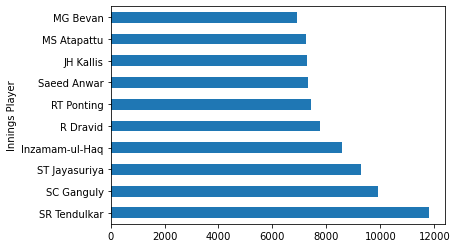

In [45]:
sachin_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending= False).head(10).plot(kind = 'barh')
plt.show()

In [46]:
kohli_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending= False).head(10)

Innings Player
V Kohli           11247
RG Sharma         8083 
HM Amla           7745 
TM Dilshan        7296 
KC Sangakkara     7275 
AB de Villiers    7247 
LRPL Taylor       7059 
MS Dhoni          6838 
EJG Morgan        6748 
MJ Guptill        6626 
Name: Innings Runs Scored Num, dtype: int32

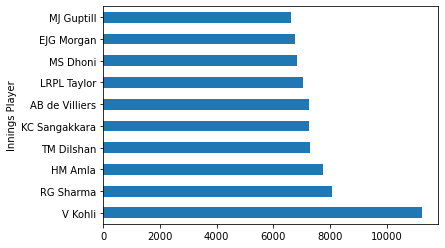

In [47]:
kohli_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending= False).head(10).plot(kind = 'barh')
plt.show()

In [48]:
sdf.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
77614,SR Tendulkar,47,47,60,1.0,0,42,9,0,111.9,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77747,SR Tendulkar,19,19,46,1.0,0,32,3,0,59.37,1,v Bangladesh,Chattogram,2004-12-23,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [49]:
sdf.groupby(['year'])['Innings Runs Scored Num'].sum()

year
1994    1089
1995    444 
1996    1611
1997    1011
1998    1894
1999    843 
2000    1328
2001    904 
2002    741 
2003    1141
2004    812 
Name: Innings Runs Scored Num, dtype: int32

<AxesSubplot:xlabel='year'>

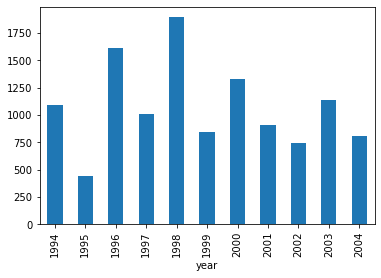

In [50]:
sdf.groupby(['year'])['Innings Runs Scored Num'].sum().plot(kind = 'bar')

In [51]:
kdf.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
11,V Kohli,120,120,179,1.0,0,125,14,1,96,1,v West Indies,Port of Spain,2019-11-08,India,0.0,1.0,100-149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
327,V Kohli,1,1,8,1.0,0,6,0,0,16.66,2,v New Zealand,Manchester,2019-09-07,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [52]:
kdf.groupby(['year'])['Innings Runs Scored Num'].sum()

year
2009    325 
2010    995 
2011    1381
2012    1026
2013    1268
2014    1054
2015    623 
2016    739 
2017    1460
2018    1202
2019    1174
Name: Innings Runs Scored Num, dtype: int32

<AxesSubplot:xlabel='year'>

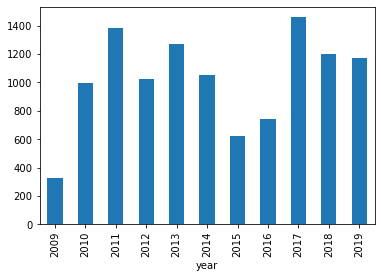

In [53]:
kdf.groupby(['year'])['Innings Runs Scored Num'].sum().plot(kind = 'bar')

### Normalization :

In [54]:
sum(kdf['Innings Runs Scored Num'])/len(kdf),sum(sdf['Innings Runs Scored Num'])/len(sdf)

(50.20982142857143, 43.608856088560884)

In [55]:
# player runs excluding kohli-- not_kohli = kohli_df[kohli_df.player_name != 'V Kohli']

In [56]:
# RPI - sachin , virat
sum(kohli_df['Innings Runs Scored Num'])/len(kohli_df)

24.99673202614379

In [57]:
kohli_df.head(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
0,E Lewis,65,65,128,1.0,0,80,8,1,81.25,2,v India,Port of Spain,2019-11-08,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [58]:
non_kohli_df = kohli_df[kohli_df['Innings Player'] != 'V Kohli']

In [59]:
non_sachin_df = sachin_df[sachin_df['Innings Player'] != 'SR Tendulkar']

In [60]:
(sum(kdf['Innings Runs Scored Num'])/len(kdf))/(sum(non_kohli_df['Innings Runs Scored Num'])/len(non_kohli_df))

2.029683688052565

In [61]:
(sum(sdf['Innings Runs Scored Num'])/len(sdf))/(sum(non_sachin_df['Innings Runs Scored Num'])/len(non_sachin_df))

1.9437755485945407

## AB de villiers vs Bumrah

In [109]:
# ipl_ball_by_ball_data

In [110]:
df = pd.read_csv('ipl_ball_by_ball_data.csv')

In [111]:
df.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [112]:
df.innings.unique()

array([1, 2, 4, 3, 5, 6], dtype=int64)

In [113]:
df = df[(df.innings ==1) | (df.innings ==2)]

In [114]:
df.innings.unique()

array([1, 2], dtype=int64)

In [115]:
# what are the no.when ABD faces Bumrah
# step 1 filter by player
# step 2 use these names & assign it to striker and bowler
# step 3 get the required columns

In [116]:
df.bowling_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [117]:
df[df.bowling_team == 'Mumbai Indians']['bowler'].unique()

array(['DS Kulkarni', 'A Nehra', 'AM Nayar', 'Harbhajan Singh',
       'ST Jayasuriya', 'SM Pollock', 'MA Khote', 'DJ Bravo',
       'VS Yeligati', 'SD Chitnis', 'CRD Fernando', 'DJ Thornely',
       'RR Raje', 'DR Smith', 'A Nel', 'SL Malinga', 'Z Khan',
       'SR Tendulkar', 'JP Duminy', 'GR Napier', 'C Nanda', 'AM Rahane',
       'RA Shaikh', 'R McLaren', 'R Sathish', 'AG Murtaza', 'KA Pollard',
       'AN Ahmed', 'STR Binny', 'MM Patel', 'JEC Franklin', 'RG Sharma',
       'A Symonds', 'TL Suman', 'RW Price', 'PP Ojha', 'RP Singh',
       'CJ McKay', 'NLTC Perera', 'RJ Peterson', 'R Shukla', 'JDP Oram',
       'JJ Bumrah', 'MG Johnson', 'R Dhawan', 'YS Chahal', 'P Suyal',
       'GJ Maxwell', 'NM Coulter-Nile', 'CJ Anderson', 'P Kumar',
       'LMP Simmons', 'S Gopal', 'K Santokie', 'M de Lange',
       'R Vinay Kumar', 'J Suchith', 'MJ McClenaghan', 'HH Pandya',
       'TG Southee', 'KH Pandya', 'N Rana', 'KV Sharma', 'M Markande',
       'Mustafizur Rahman', 'PJ Sangwan', 'BCJ C

In [118]:
df[df.batting_team == 'Royal Challengers Bangalore']['striker'].unique()

array(['W Jaffer', 'JH Kallis', 'CL White', 'MV Boucher', 'R Dravid',
       'V Kohli', 'P Kumar', 'Z Khan', 'SB Joshi', 'AA Noffke', 'B Akhil',
       'LRPL Taylor', 'S Chanderpaul', 'R Vinay Kumar', 'DW Steyn',
       'B Chipli', 'Misbah-ul-Haq', 'DT Patil', 'A Kumble', 'J Arunkumar',
       'Abdur Razzak', 'SP Goswami', 'KP Pietersen', 'RV Uthappa',
       'JD Ryder', 'R Bishnoi', 'KV Sharma', 'Pankaj Singh', 'MK Pandey',
       'RE van der Merwe', 'KP Appanna', 'D du Preez', 'EJG Morgan',
       'A Mithun', 'S Sriram', 'MA Agarwal', 'AB de Villiers',
       'TM Dilshan', 'SS Tiwary', 'AUK Pathan', 'S Aravind', 'CA Pujara',
       'JJ van der Wath', 'R Ninan', 'DL Vettori', 'CH Gayle',
       'J Syed Mohammad', 'M Kaif', 'LA Pomersbach', 'KB Arun Karthik',
       'CK Langeveldt', 'AB McDonald', 'HV Patel', 'RR Bhatkal',
       'M Muralitharan', 'P Parameswaran', 'DT Christian', 'KK Nair',
       'MC Henriques', 'M Kartik', 'JD Unadkat', 'R Rampaul', 'KL Rahul',
       'A Mukund', 'P

In [119]:
# player 1 = JJ Bumrah
# player 2 = AB de Villiers

In [120]:
req_df = df[(df.striker == 'AB de Villiers')& (df.bowler == 'JJ Bumrah')]

In [121]:
req_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
95889,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.6,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95890,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.5,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95892,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.3,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95893,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.2,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95894,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.1,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
# no of runs scored ?
# no of balls faced ?
# no of time dismissed ?

In [123]:
req_df.runs_off_bat


95889     0
95890     0
95892     1
95893     0
95894     6
95985     2
95987     1
95990     1
100846    0
100847    0
100849    0
112530    0
119489    2
119490    2
119491    4
119493    1
119533    1
119534    0
119535    6
119536    6
119578    1
119594    1
119595    2
119596    0
119605    1
125645    1
125647    1
132146    1
132167    0
132168    0
132169    0
132170    0
132171    0
132172    1
139429    1
139430    6
139432    1
166262    1
166274    0
166277    0
166278    1
166305    1
166307    1
166309    0
166310    0
172148    0
172149    0
172150    4
172151    0
172152    0
172200    0
172201    0
172202    0
172213    3
172216    1
172226    4
172227    4
172228    0
172229    0
172230    1
181280    4
181283    6
181284    0
181285    0
181306    6
181331    4
181333    1
181335    6
190623    1
190624    0
193683    1
193688    1
193695    4
193696    2
193697    4
193698    1
193700    1
193725    1
193738    0
Name: runs_off_bat, dtype: int64

In [124]:
# no of runs scored ?
sum(req_df.runs_off_bat)

114

In [125]:
# balls faced 
len(req_df)

79

In [126]:
# no of time dismissed ?
req_df[req_df.player_dismissed == 'AB de Villiers']

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
100849,733983,2014,2014-05-06,Wankhede Stadium,2,12.4,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,V Kohli,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,bowled,AB de Villiers,NaN,NaN
112530,829737,2015,2015-04-19,M Chinnaswamy Stadium,2,14.2,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,D Wiese,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,caught,AB de Villiers,NaN,NaN


In [127]:
len(req_df[req_df.player_dismissed == 'AB de Villiers'])

2

In [128]:
# strike rate
100*sum(req_df.runs_off_bat)/len(req_df)

144.30379746835442

In [129]:
# comparison against all batsman has bowled to

In [130]:
df.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
bumrah_df = df[df.bowler == 'JJ Bumrah']

In [158]:
bumrah_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
76731,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,6.1,Royal Challengers Bangalore,Mumbai Indians,MA Agarwal,CH Gayle,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,caught,MA Agarwal,NaN,NaN
76732,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,6.2,Royal Challengers Bangalore,Mumbai Indians,DT Christian,CH Gayle,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76733,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,6.3,Royal Challengers Bangalore,Mumbai Indians,DT Christian,CH Gayle,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76734,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,6.4,Royal Challengers Bangalore,Mumbai Indians,DT Christian,CH Gayle,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76735,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,6.5,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,DT Christian,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
# runs scored by this batsman
bdf1 = pd.DataFrame(bumrah_df.groupby('striker')['runs_off_bat'].sum()).reset_index()

In [159]:
bdf1.head()

,striker,runs_off_bat
0,A Mishra,1
1,AB de Villiers,114
2,AD Nath,4
3,AD Russell,51
4,AJ Finch,24


In [154]:
bdf2 =pd.DataFrame(bumrah_df.groupby('striker')['ball'].count()).reset_index()

In [155]:
bdf2.head()

,striker,ball
0,A Mishra,5
1,AB de Villiers,79
2,AD Nath,4
3,AD Russell,41
4,AJ Finch,29


In [156]:
bdf1.merge(bdf2, on= 'striker', how= 'left')

,striker,runs_off_bat,ball
0,A Mishra,1,5
1,AB de Villiers,114,79
2,AD Nath,4,4
3,AD Russell,51,41
4,AJ Finch,24,29
5,AJ Turner,0,1
6,AJ Tye,11,7
7,AM Rahane,43,35
8,AR Patel,21,32
9,AS Rajpoot,5,6


In [160]:
bdf3 = bdf1.merge(bdf2, on= 'striker', how= 'left')

In [161]:
bdf3.head(1)

,striker,runs_off_bat,ball
0,A Mishra,1,5


In [162]:
bdf3['strike_rate'] = 100*bdf3['runs_off_bat']/bdf3['ball']

In [163]:
bdf3.head()

,striker,runs_off_bat,ball,strike_rate
0,A Mishra,1,5,20.000000
1,AB de Villiers,114,79,144.303797
2,AD Nath,4,4,100.000000
3,AD Russell,51,41,124.390244
4,AJ Finch,24,29,82.758621


In [164]:
# min criteria : 30 balls

In [165]:
bdf3 = bdf3[bdf3.ball>= 30]

In [166]:
bdf3.head()

,striker,runs_off_bat,ball,strike_rate
1,AB de Villiers,114,79,144.303797
3,AD Russell,51,41,124.390244
7,AM Rahane,43,35,122.857143
8,AR Patel,21,32,65.625000
11,AT Rayudu,48,34,141.176471


In [167]:
abd_df = df[df.striker == 'AB de Villiers']

In [172]:
# runs scored by this batsman
adf1 = pd.DataFrame(abd_df.groupby('bowler')['runs_off_bat'].sum()).reset_index()

In [173]:
adf1.head()

,bowler,runs_off_bat
0,A Ashish Reddy,46
1,A Chandila,26
2,A Flintoff,34
3,A Kumble,39
4,A Mishra,40


In [176]:
# balls faced
adf2 =pd.DataFrame(abd_df.groupby('bowler')['ball'].count()).reset_index()

In [177]:
adf2.head()

,bowler,ball
0,A Ashish Reddy,18
1,A Chandila,11
2,A Flintoff,12
3,A Kumble,41
4,A Mishra,37


In [178]:
adf3 = adf1.merge(adf2, on= 'bowler', how= 'left')

In [179]:
adf3.head()

,bowler,runs_off_bat,ball
0,A Ashish Reddy,46,18
1,A Chandila,26,11
2,A Flintoff,34,12
3,A Kumble,39,41
4,A Mishra,40,37


In [180]:
adf3['strike_rate'] = 100*adf3['runs_off_bat']/adf3['ball']

In [181]:
adf3.head()

,bowler,runs_off_bat,ball,strike_rate
0,A Ashish Reddy,46,18,255.555556
1,A Chandila,26,11,236.363636
2,A Flintoff,34,12,283.333333
3,A Kumble,39,41,95.121951
4,A Mishra,40,37,108.108108


In [182]:
adf3 = adf3[adf3.ball>= 30]

In [183]:
adf3.head()

,bowler,runs_off_bat,ball,strike_rate
3,A Kumble,39,41,95.121951
4,A Mishra,40,37,108.108108
16,AD Russell,87,38,228.947368
20,AR Patel,70,65,107.692308
31,B Kumar,61,39,156.410256


In [186]:
# bdf3, adf3

In [188]:
bdf3.reset_index(inplace=True, drop= True)
adf3.reset_index(inplace=True, drop= True)

In [190]:
bdf3

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,114,79,144.303797
1,AD Russell,51,41,124.390244
2,AM Rahane,43,35,122.857143
3,AR Patel,21,32,65.625000
4,AT Rayudu,48,34,141.176471
5,CH Gayle,37,53,69.811321
6,DA Warner,54,47,114.893617
7,F du Plessis,58,34,170.588235
8,G Gambhir,29,33,87.878788
9,GJ Maxwell,39,34,114.705882


In [189]:
bdf3.sort_values('strike_rate', ascending = False)

,striker,runs_off_bat,ball,strike_rate
11,JP Duminy,70,33,212.121212
7,F du Plessis,58,34,170.588235
12,KD Karthik,54,33,163.636364
22,SS Iyer,52,35,148.571429
17,RV Uthappa,52,36,144.444444
0,AB de Villiers,114,79,144.303797
24,V Kohli,115,81,141.975309
4,AT Rayudu,48,34,141.176471
19,SK Raina,50,39,128.205128
13,KL Rahul,104,82,126.829268


In [193]:
bdf3.head()

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,114,79,144.303797
1,AD Russell,51,41,124.390244
2,AM Rahane,43,35,122.857143
3,AR Patel,21,32,65.625000
4,AT Rayudu,48,34,141.176471


In [192]:
#adf3.sort_values('strike_rate', ascending = False)

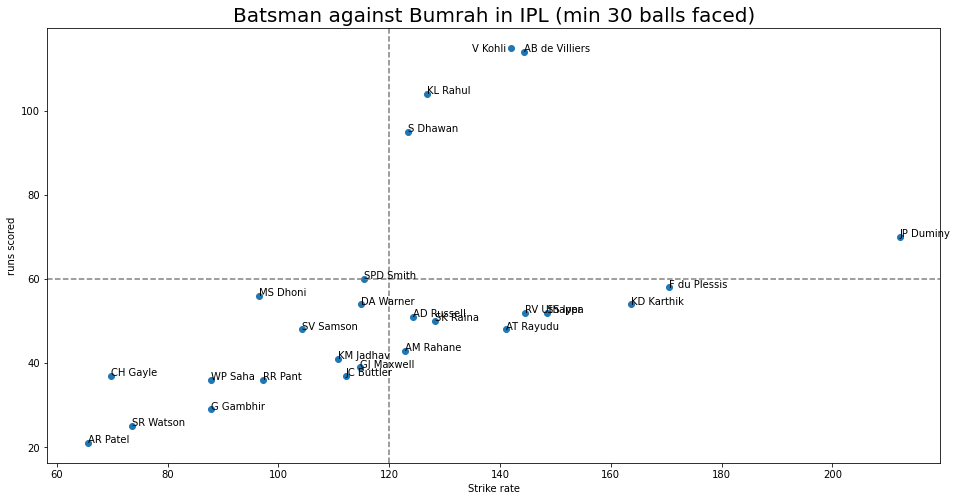

In [206]:
plt.figure(figsize=(16,8))
plt.scatter(bdf3.strike_rate, bdf3.runs_off_bat)
for i in range (len(bdf3)):
    #plt.text(x,y, text)
    if bdf3['striker'][i] == 'V Kohli':
        plt.text(bdf3['strike_rate'][i] - 7, bdf3['runs_off_bat'][i] -1 , bdf3['striker'][i])
    else:    
        plt.text(bdf3['strike_rate'][i], bdf3['runs_off_bat'][i], bdf3['striker'][i])
plt.axvline(120, ls= '--' , color = 'grey')
plt.axhline(60, ls= '--' , color = 'grey') 
        
plt.title('Batsman against Bumrah in IPL (min 30 balls faced)', fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('runs scored')
plt.show()

In [207]:
adf3.sort_values('strike_rate', ascending = False)

,bowler,runs_off_bat,ball,strike_rate
2,AD Russell,87,38,228.947368
8,HH Pandya,88,39,225.641026
15,JP Faulkner,62,30,206.666667
5,CH Morris,71,35,202.857143
28,SL Malinga,124,64,193.750000
31,Sandeep Sharma,107,57,187.719298
26,SB Jakati,55,30,183.333333
17,M Ashwin,55,31,177.419355
20,PV Tambe,54,32,168.750000
4,B Kumar,61,39,156.410256


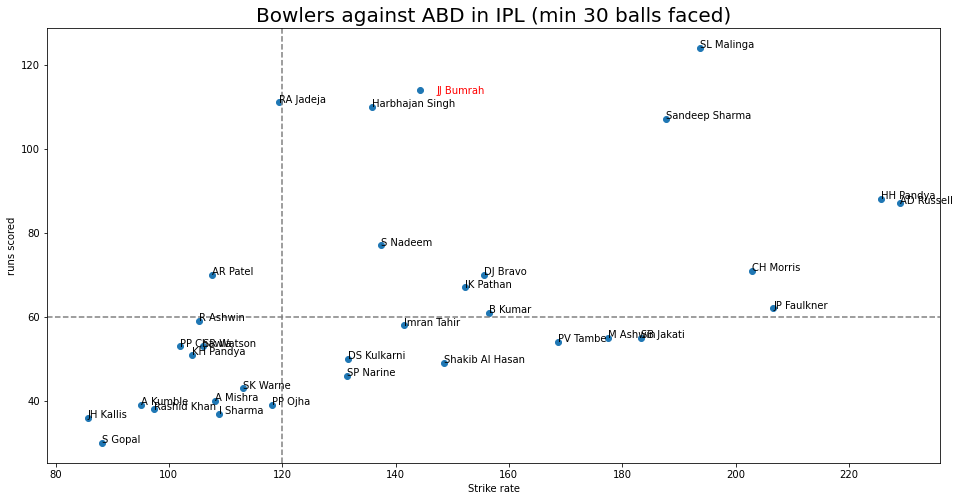

In [216]:
plt.figure(figsize=(16,8))
plt.scatter(adf3.strike_rate, adf3.runs_off_bat)
for i in range (len(adf3)):
    #plt.text(x,y, text)
    if adf3['bowler'][i] == 'JJ Bumrah':
        plt.text(adf3['strike_rate'][i] + 3, adf3['runs_off_bat'][i] -1 , adf3['bowler'][i] , color= 'red')
    else:    
        plt.text(adf3['strike_rate'][i], adf3['runs_off_bat'][i], adf3['bowler'][i])
plt.axvline(120, ls= '--' , color = 'grey')
plt.axhline(60, ls= '--' , color = 'grey') 
        
plt.title('Bowlers against ABD in IPL (min 30 balls faced)', fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('runs scored')
plt.show()